# trim_nonpercolating_paths

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

np.random.seed(0)
ps.visualization.set_mpl_style()

## Create image and variables

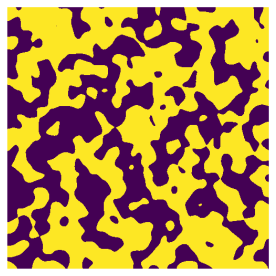

In [2]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.55, blobiness=1.5)
plt.figure(figsize=[4, 4])
plt.axis(False)
plt.imshow(im)

## Apply filter
This trims no only isolated blobs in the middle but also those touching edges but not spanning the domain:

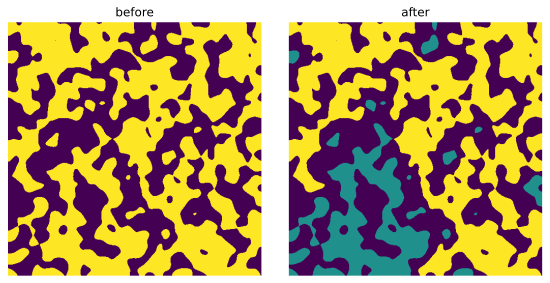

In [3]:
inlets = np.zeros_like(im)
inlets[0, :] = True
outlets = np.zeros_like(im)
outlets[-1, :] = True

x = ps.filters.trim_nonpercolating_paths(im=im, inlets=inlets, outlets= outlets)

fig, ax = plt.subplots(1, 2, figsize=[8, 4]);
ax[0].imshow(im);
ax[1].imshow(x + (im != x)*0.5);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('before')
ax[1].set_title('after');